# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

#### Simulated Annealing

Per implementare l'algoritmo del simulated annealing scelgo un insieme di temperature fittizie suddividendo l'intervallo $[0.0, 2.0]$ in $N=10000$ parti. Da tali $T$ ottenute si definisce $\beta = 1/ T$.

Utilizzo come punto di partenza il vettore $[1, 2, ..., N]$ e per ciascuna di queste temperature tento le mutazioni (ciascuna con probabilità al $70\%$). Con le stesse città utilizzate per l'algoritmo genetico calcolo la fitness del percorso proposto, in questo modo la probabilità di accettazione è data da:

$$ P = e^{-\beta \Delta L} \quad \mathrm{con} \quad \Delta L = L^{(1)}_{\mathrm{new}} - L^{(1)}_{\mathrm{old}} $$

e il nuovo percorso viene accettato secondo le regole del Metropolis. Per ogni temperatura scelgo di imporre un valore minimo di iterazioni $n_{\mathrm{min}}=100$ e uno massimo $n_{\mathrm{max}}=1000$. A temperature più alte vengono accettate anche configurazioni peggiori delle precedente, mentre man mano che la temperatura scende solo i percorsi migliori hanno probabilità significativa di essere accettati. Per questo motivo impongo la seguente condizione: se dopo $n_{\mathrm{min}}$ iterazioni il percorso non è mai cambiato allora continuo per altre $n_{\mathrm{min}}$, fino ad arrivare eventualmente al limite di $n_{\mathrm{max}}$ iterazioni.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ordina(x, path): #ordina il vettore x secondo il vettore path
    
    size=len(x)
    x_ord=np.zeros(size)

    for i,j in enumerate(path):
        order=int(j-1)
        x_ord[i]=x[order]
    
    return x_ord

In [3]:
T_c, LofT_c = np.loadtxt("Es10.1/LofT_circle.dat", usecols=(0,1), delimiter=' ', unpack=True)
L_c = np.loadtxt("Es10.1/Ls_circle.dat", usecols=(0), delimiter=' ', unpack=True)

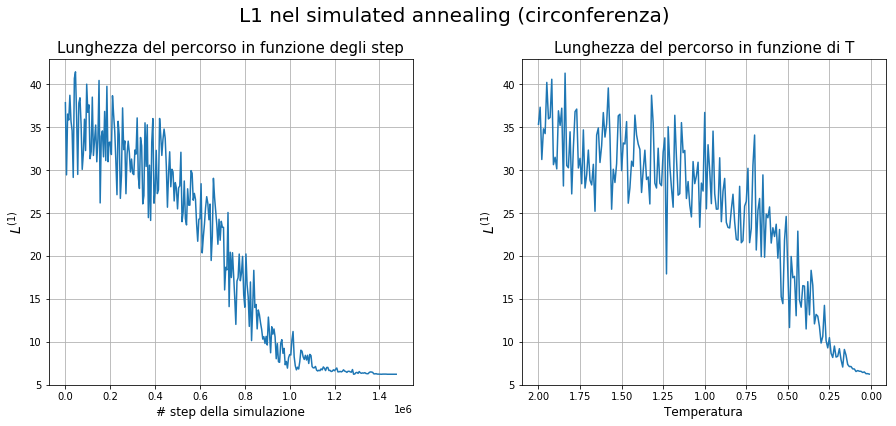

In [4]:
skip=5000
N_c = np.arange(0, len(L_c), skip)

fig = plt.figure(figsize = (15,6))
plt.suptitle('L1 nel simulated annealing (circonferenza)', size=20, y=1)

plt.subplot(1, 2, 1) 

plt.plot(N_c, L_c[::skip])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylim(5,43)
plt.xlabel('# step della simulazione',size=12)
plt.ylabel('$L^{(1)}$',size=14)
plt.title('Lunghezza del percorso in funzione degli step', size=15)
plt.grid(True)


plt.subplot(1, 2, 2) 

plt.plot(T_c[::50],LofT_c[::50])
plt.gca().invert_xaxis()
plt.ylim(5,43)
plt.xlabel('Temperatura', size=12)
plt.ylabel('$L^{(1)}$',size=14)
plt.title('Lunghezza del percorso in funzione di T', size=15)
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

A sinistra è rappresentato l'andamento di $L^{(1)}$ in funzione del numero di step, plottando un punto ogni $5000$. A destra viene raffigurata la stessa grandezza in funzione della temperatura, rappresentando un punto ogni $50$. Confrontando i due grafici si vede che circa metà della simulazione avviene a $T$ inferiori a $0.5$. Alle temperature più basse vengono tentati molti passi per trovare il percorso più breve.

In [5]:
x_c_SA, y_c_SA = np.loadtxt("Es10.1/cities_circle.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_c_SA = np.loadtxt("Es10.1/optimal_path_circle.dat", usecols=(0), delimiter=' ', unpack=True)

x_ord_c_SA=ordina(x_c_SA, path_c_SA)
y_ord_c_SA=ordina(y_c_SA, path_c_SA)


############################ RISULTATI CON L'ALGORITMO GENETICO ##################################

x_c_GA, y_c_GA = np.loadtxt("RisultatiGA/cities_circle.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_c_GA = np.loadtxt("RisultatiGA/optimal_path_circle.dat", usecols=(0), delimiter=' ', unpack=True)

x_ord_c_GA=ordina(x_c_GA, path_c_GA)
y_ord_c_GA=ordina(y_c_GA, path_c_GA)

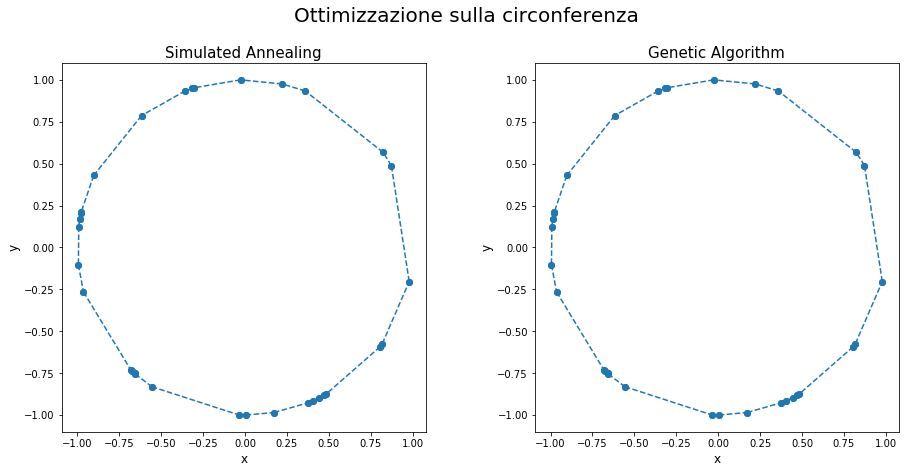

In [6]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('Ottimizzazione sulla circonferenza', size=20)

plt.subplot(1, 2, 1)    

size_c_SA=len(x_ord_c_SA)
for i in range(0, size_c_SA-1):
    
    plt.plot([x_ord_c_SA[i],x_ord_c_SA[i+1]], [y_ord_c_SA[i],y_ord_c_SA[i+1]], 'ro--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_c_SA[0], x_ord_c_SA[size_c_SA-1]], [y_ord_c_SA[0], y_ord_c_SA[size_c_SA-1]], 'ro--', color='tab:blue',  zorder=1)

plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title("Simulated Annealing", size=15)
plt.gca().set_aspect('equal', adjustable='box')



plt.subplot(1, 2, 2)

size_c_GA=len(x_ord_c_GA)
for i in range(0, size_c_GA-1):
    
    plt.plot([x_ord_c_GA[i],x_ord_c_GA[i+1]], [y_ord_c_GA[i],y_ord_c_GA[i+1]], 'ro--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_c_GA[0], x_ord_c_GA[size_c_GA-1]], [y_ord_c_GA[0], y_ord_c_GA[size_c_GA-1]], 'ro--', color='tab:blue',  zorder=1)

plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.title("Genetic Algorithm", size=15)
plt.gca().set_aspect('equal', adjustable='box')


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Nel caso della circonferenza il percorso ottimale trovato da entrambi i metodi è lo stesso e ha lunghezza pari a $L^{(1)} = 6.22997$.

In [7]:
T_s, LofT_s = np.loadtxt("Es10.1/LofT_square.dat", usecols=(0,1), delimiter=' ', unpack=True)
L_s = np.loadtxt("Es10.1/Ls_square.dat", usecols=(0), delimiter=' ', unpack=True)

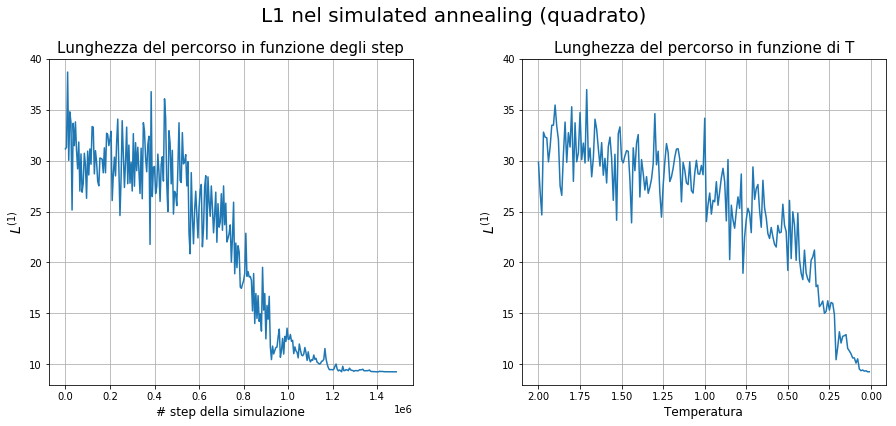

In [8]:
skip=5000
N_s = np.arange(0, len(L_s), skip)

fig = plt.figure(figsize = (15,6))
plt.suptitle('L1 nel simulated annealing (quadrato)', size=20, y=1)

plt.subplot(1, 2, 1) 

plt.plot(N_s, L_s[::skip])
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylim(8,40)
plt.xlabel('# step della simulazione',size=12)
plt.ylabel('$L^{(1)}$',size=14)
plt.title('Lunghezza del percorso in funzione degli step', size=15)
plt.grid(True)


plt.subplot(1, 2, 2) 

plt.plot(T_s[::50],LofT_s[::50])
plt.gca().invert_xaxis()
plt.ylim(8,40)
plt.xlabel('Temperatura', size=12)
plt.ylabel('$L^{(1)}$',size=14)
plt.title('Lunghezza del percorso in funzione di T', size=15)
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

A sinistra è rappresentato l'andamento di $L^{(1)}$ in funzione del numero di step, plottando un punto ogni $5000$. A destra viene raffigurata la stessa grandezza in funzione della temperatura, rappresentando un punto ogni $50$. Analogamente a ciò che si osserva per la circonferenza, circa metà della simulazione avviene a $T$ inferiori a $0.5$ e alle temperature più basse vengono tentati molti passi per trovare il percorso più breve.

In [9]:
x_s_SA, y_s_SA = np.loadtxt("Es10.1/cities_square.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_s_SA = np.loadtxt("Es10.1/optimal_path_square.dat", usecols=(0), delimiter=' ', unpack=True)

x_ord_s_SA=ordina(x_s_SA, path_s_SA)
y_ord_s_SA=ordina(y_s_SA, path_s_SA)


############################ RISULTATI CON L'ALGORITMO GENETICO ##################################

x_s_GA, y_s_GA = np.loadtxt("RisultatiGA/cities_square.dat", usecols=(0,1), delimiter=' ', unpack=True)
path_s_GA = np.loadtxt("RisultatiGA/optimal_path_square.dat", usecols=(0), delimiter=' ', unpack=True)

x_ord_s_GA=ordina(x_s_GA, path_s_GA)
y_ord_s_GA=ordina(y_s_GA, path_s_GA)

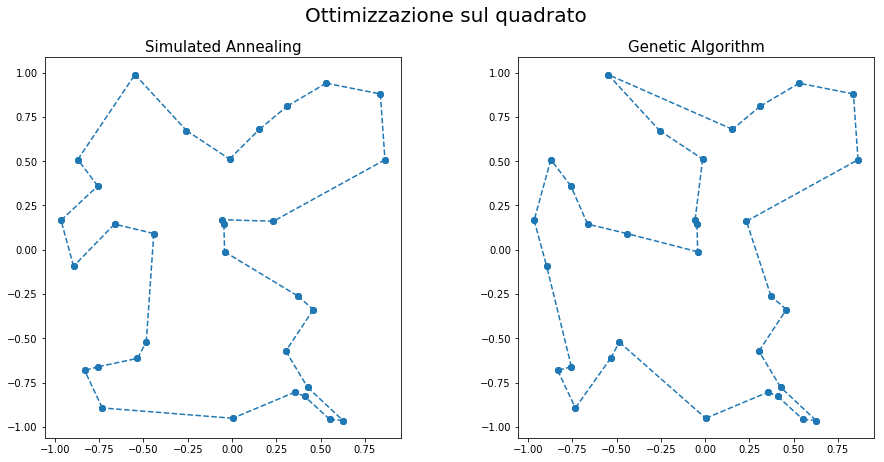

In [10]:
fig = plt.figure(figsize = (15,7))
plt.suptitle('Ottimizzazione sul quadrato', size=20)

plt.subplot(1, 2, 1)    

size_s_SA=len(x_ord_s_SA)
for i in range(0, size_s_SA-1):
    
    plt.plot([x_ord_s_SA[i],x_ord_s_SA[i+1]], [y_ord_s_SA[i],y_ord_s_SA[i+1]], 'ro--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_s_SA[0], x_ord_s_SA[size_s_SA-1]], [y_ord_s_SA[0], y_ord_s_SA[size_s_SA-1]], 'ro--', color='tab:blue',  zorder=1)


plt.gca().set_aspect('equal', adjustable='box')
plt.title("Simulated Annealing", size=15)


plt.subplot(1, 2, 2)

size_s_GA=len(x_ord_s_GA)
for i in range(0, size_s_GA-1):
    
    plt.plot([x_ord_s_GA[i],x_ord_s_GA[i+1]], [y_ord_s_GA[i],y_ord_s_GA[i+1]], 'ro--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_s_GA[0], x_ord_s_GA[size_s_GA-1]], [y_ord_s_GA[0], y_ord_s_GA[size_s_GA-1]], 'ro--', color='tab:blue',  zorder=1)


plt.gca().set_aspect('equal', adjustable='box')
plt.title("Genetic Algorithm", size=15)


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Il simulated annealing ottimizza meglio il percorso, con una lunghezza di $L^{(1)} = 9.27331$, più breve di $L^{(1)} = 9.62746$ ottenuta con l'algoritmo genetico.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

#### Algoritmo genetico con migrazioni

Utilizzo il calcolo parallelo per simulare l'evoluzione del problema del commesso viaggiatore su 4 continenti diversi. Eseguo l'algoritmo genetico in parallelo su ciascun nodo, con $500$ iterazioni e probabilità di mutazione e di crossover rispettivamente del $5\%$ e del $75 \%$. Dopo un numero di $N_{\mathrm{migr}}$ generazioni determino due coppie di continenti che si scambino il loro migliore individuo.

In [11]:
L_best_GA = np.loadtxt("RisultatiGA/best_square.dat", usecols=(0), delimiter=' ', unpack=True)
L_ave_GA = np.loadtxt("RisultatiGA/ave_square.dat", usecols=(0), delimiter=' ', unpack=True)

x_s, y_s = np.loadtxt("Es10.2/cities_square.dat", usecols=(0,1), delimiter=' ', unpack=True)

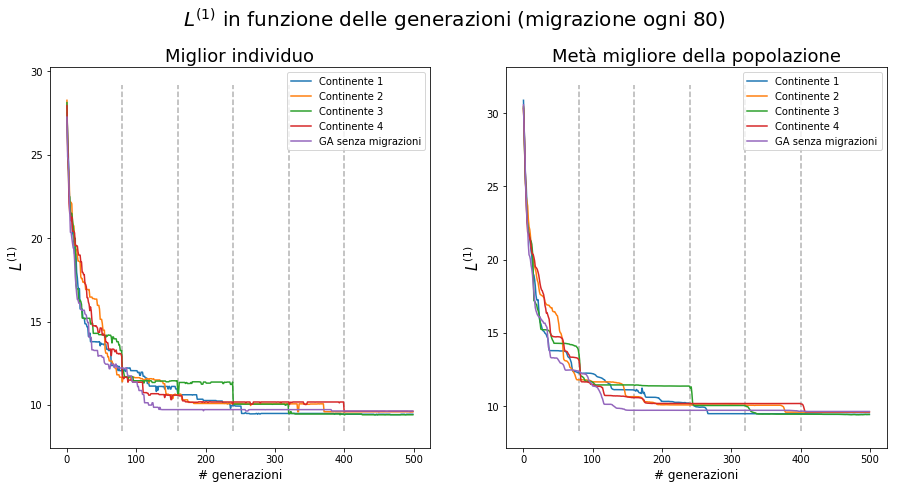

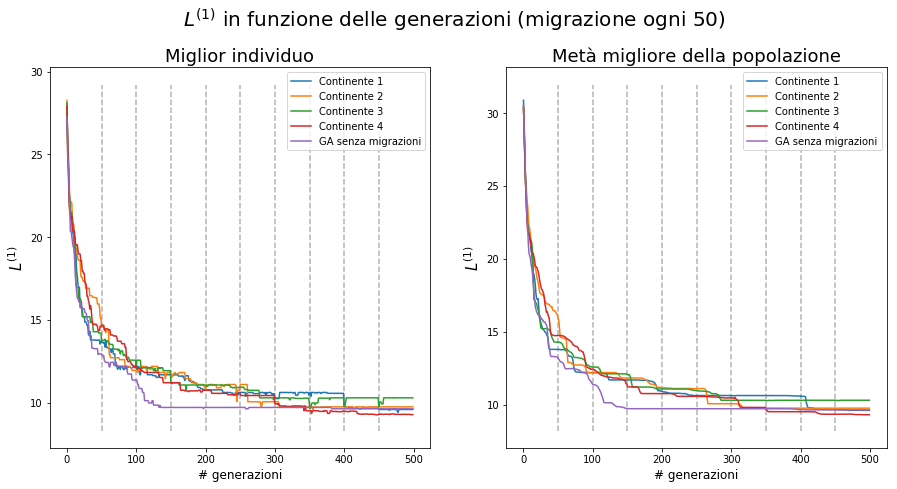

In [12]:
for i in range(2):
    
    if i==0:
        Nmigr=str(80)
        
    if i==1:
        Nmigr=str(50)
        

    L_best_1 = np.loadtxt("Es10.2/best_square_cont1_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    L_ave_1 = np.loadtxt("Es10.2/ave_square_cont1_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)

    L_best_2 = np.loadtxt("Es10.2/best_square_cont2_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    L_ave_2 = np.loadtxt("Es10.2/ave_square_cont2_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)

    L_best_3 = np.loadtxt("Es10.2/best_square_cont3_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    L_ave_3 = np.loadtxt("Es10.2/ave_square_cont3_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)

    L_best_4 = np.loadtxt("Es10.2/best_square_cont4_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    L_ave_4 = np.loadtxt("Es10.2/ave_square_cont4_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)

    
    fig = plt.figure(figsize = (15,7))

    plt.suptitle('$L^{(1)}$ in funzione delle generazioni (migrazione ogni '+Nmigr+')', size=20, y=1.)
    
    Nmigr=int(Nmigr)
    nlines = int(500/Nmigr)
    
    plt.subplot(1, 2, 1) 

    plt.plot(L_best_1, label='Continente 1')
    plt.plot(L_best_2, label='Continente 2')
    plt.plot(L_best_3, label='Continente 3')
    plt.plot(L_best_4, label='Continente 4')
    plt.plot(L_best_GA, label='GA senza migrazioni')
    
    ymin, ymax = plt.gca().get_ylim()
    for j in range(1,nlines):
        plt.vlines(j*Nmigr,ymin, ymax, linestyles='dashed', alpha=0.3)
    
    plt.xlabel('# generazioni', size=12)
    plt.ylabel('$L^{(1)}$', size=15)
    plt.title('Miglior individuo', size=18)
    plt.legend()


    plt.subplot(1, 2, 2) 
    plt.plot(L_ave_1, label='Continente 1')
    plt.plot(L_ave_2, label='Continente 2')
    plt.plot(L_ave_3, label='Continente 3')
    plt.plot(L_ave_4, label='Continente 4')
    plt.plot(L_ave_GA, label='GA senza migrazioni')
    
    ymin, ymax = plt.gca().get_ylim()
    for j in range(1,nlines):
        plt.vlines(j*Nmigr,ymin, ymax, linestyles='dashed', alpha=0.3)
    
    plt.xlabel('# generazioni', size=12)
    plt.ylabel('$L^{(1)}$', size=15)
    plt.title('Metà migliore della popolazione', size=18)
    plt.legend()


plt.show();

Sono rappresentati gli andamenti delle fitness per tutti i continenti e nel caso senza migrazioni, sia per il miglior individuo che per la metà migliore della popolazione. Le linee verticali rappresentano le generazioni a cui avviene una migrazione. 

L'andamento della fitness dipende molto dalla frequenza delle migrazioni. I crolli più significativi nel valore di $L^{(1)}$ si osservano in corrispondenza di una migrazione. Per quanto riguarda la fitness calcolata sulla metà migliore della popolazione lo stesso crollo si osserva con qualche generazione di ritardo: un miglioramento significativo in un solo individuo si propaga su gran parte della popolazione dopo poche iterazioni dell'algoritmo.

Con migrazioni ogni $80$ generazioni la fitness diminuisce significativamente già dopo poco più di $100$ generazioni, similmente a quanto ottenuto con l'algoritmo genetico senza migrazioni. Con migrazioni ogni $50$ la decrescita è più lenta, tuttavia è in questa simulazione che si trova brevemente il miglior percorso in assoluto.

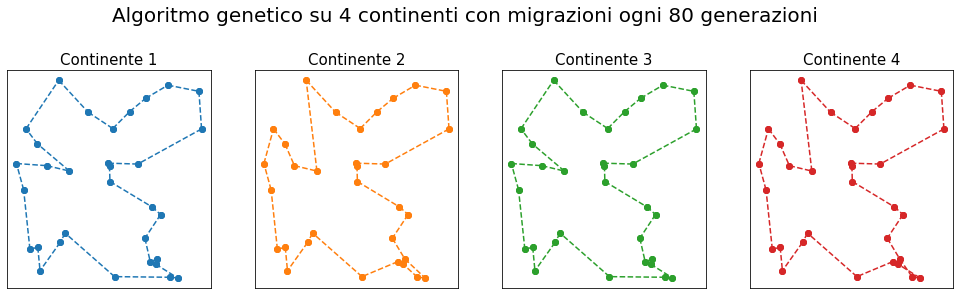

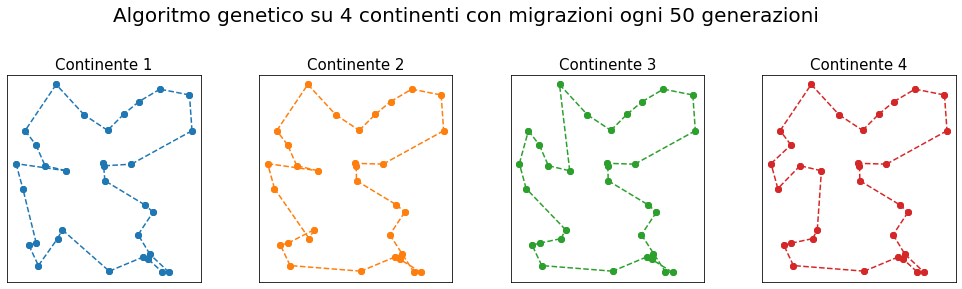

In [13]:
for i in range(2):
    
    if i==0:
        Nmigr=str(80)
        
    if i==1:
        Nmigr=str(50)


    path_1 = np.loadtxt("Es10.2/optimal_path_square_cont1_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    path_2 = np.loadtxt("Es10.2/optimal_path_square_cont2_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    path_3 = np.loadtxt("Es10.2/optimal_path_square_cont3_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)
    path_4 = np.loadtxt("Es10.2/optimal_path_square_cont4_"+Nmigr+".dat", usecols=(0), delimiter=' ', unpack=True)

    x_ord_1=ordina(x_s, path_1)
    y_ord_1=ordina(y_s, path_1)

    x_ord_2=ordina(x_s, path_2)
    y_ord_2=ordina(y_s, path_2)

    x_ord_3=ordina(x_s, path_3)
    y_ord_3=ordina(y_s, path_3)

    x_ord_4=ordina(x_s, path_4)
    y_ord_4=ordina(y_s, path_4)


    fig = plt.figure(figsize = (17,4))
    plt.suptitle('Algoritmo genetico su 4 continenti con migrazioni ogni '+Nmigr+' generazioni', size=20, y=1.1)

    plt.subplot(1, 4, 1)    

    size_s=len(x_ord_1)
    for i in range(0, size_s-1):

        plt.plot([x_ord_1[i],x_ord_1[i+1]], [y_ord_1[i],y_ord_1[i+1]], 'o--', color='tab:blue', zorder=1)

    plt.plot([x_ord_1[0], x_ord_1[size_s-1]], [y_ord_1[0], y_ord_1[size_s-1]], 'o--', color='tab:blue',  zorder=1)

    ax=plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_aspect('equal', adjustable='box')
    plt.title("Continente 1", size=15)


    plt.subplot(1, 4, 2)    

    size_s=len(x_ord_2)
    for i in range(0, size_s-1):

        plt.plot([x_ord_2[i],x_ord_2[i+1]], [y_ord_2[i],y_ord_2[i+1]], 'o--', color='tab:orange', zorder=1)

    plt.plot([x_ord_2[0], x_ord_2[size_s-1]], [y_ord_2[0], y_ord_2[size_s-1]], 'o--', color='tab:orange',  zorder=1)

    ax=plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_aspect('equal', adjustable='box')
    plt.title("Continente 2", size=15)


    plt.subplot(1, 4, 3)    

    size_s=len(x_ord_3)
    for i in range(0, size_s-1):

        plt.plot([x_ord_3[i],x_ord_3[i+1]], [y_ord_3[i],y_ord_3[i+1]], 'o--', color='tab:green', zorder=1)

    plt.plot([x_ord_3[0], x_ord_3[size_s-1]], [y_ord_3[0], y_ord_3[size_s-1]], 'o--', color='tab:green',  zorder=1)

    ax=plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_aspect('equal', adjustable='box')
    plt.title("Continente 3", size=15)


    plt.subplot(1, 4, 4)    

    size_s=len(x_ord_4)
    for i in range(0, size_s-1):

        plt.plot([x_ord_4[i],x_ord_4[i+1]], [y_ord_4[i],y_ord_4[i+1]], 'o--', color='tab:red', zorder=1)

    plt.plot([x_ord_4[0], x_ord_4[size_s-1]], [y_ord_4[0], y_ord_4[size_s-1]], 'o--', color='tab:red',  zorder=1)

    ax=plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_aspect('equal', adjustable='box')
    plt.title("Continente 4", size=15)

    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Nel caso dell'algoritmo genetico semplice con $500$ generazioni ottengo $L^{(1)} = 9.62746$.
Aggiungendo le migrazioni il risultato dipende molto dalla frequenza con cui vengono implementate.

Nel caso di migrazioni ogni $80$ generazioni ottengo i seguenti valori per la fitness:

| Continente| $L^{(1)}$|
|-----------|----------|
| <div align='center'> 1 | 9.40661 |
| <div align='center'> 2 | 9.58045 |
| <div align='center'> 3 | 9.40661 |
| <div align='center'> 4 | 9.59011 |



Su tutti i continenti il risultato è migliore di quello ottenuto senza migrazioni, ma nessuna delle soluzioni è quella ottimale (danno tutte un valore di $L^{(1)}$ maggiore rispetto a quello ottenuto con il simulated annealing).

Nel caso di migrazioni ogni $50$ generazioni ottengo i seguenti valori per la fitness:

| Continente| $L^{(1)}$|
|-----------|----------|
| <div align='center'> 1 | 9.43725 |
| <div align='center'> 2 | 9.59908 |
| <div align='center'> 3 | 9.63292 |
| <div align='center'> 4 | 9.27331 |

Ad eccezione del continente 3 il valore di $L^{(1)}$ è migliore rispetto all'esecuzione dell'algoritmo senza migrazioni. La soluzione migliore inoltre è la stessa del simulated annealing. 

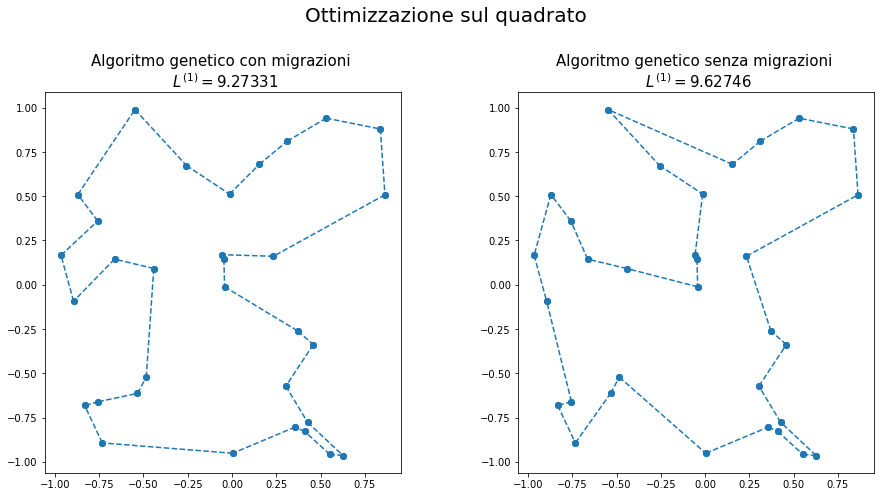

In [14]:
path_best = np.loadtxt("Es10.2/optimal_path_square_50.dat", usecols=(0), delimiter=' ', unpack=True)

x_ord_best=ordina(x_s, path_best)
y_ord_best=ordina(y_s, path_best)


fig = plt.figure(figsize = (15,7))
plt.suptitle('Ottimizzazione sul quadrato', size=20, y=1.05)

plt.subplot(1, 2, 1)    

size_s_best=len(x_ord_best)
for i in range(0, size_s_best-1):
    
    plt.plot([x_ord_best[i],x_ord_best[i+1]], [y_ord_best[i],y_ord_best[i+1]], 'o--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_best[0], x_ord_best[size_s_best-1]], [y_ord_best[0], y_ord_best[size_s_best-1]], 'o--', color='tab:blue',  zorder=1)

plt.gca().set_aspect('equal', adjustable='box')
plt.title("Algoritmo genetico con migrazioni \n $L^{(1)} = 9.27331$", size=15)



plt.subplot(1, 2, 2)

size_s_GA=len(x_ord_s_GA)
for i in range(0, size_s_GA-1):
    
    plt.plot([x_ord_s_GA[i],x_ord_s_GA[i+1]], [y_ord_s_GA[i],y_ord_s_GA[i+1]], 'ro--', color='tab:blue', zorder=1)
    
plt.plot([x_ord_s_GA[0], x_ord_s_GA[size_s_GA-1]], [y_ord_s_GA[0], y_ord_s_GA[size_s_GA-1]], 'ro--', color='tab:blue',  zorder=1)

plt.gca().set_aspect('equal', adjustable='box')
plt.title("Algoritmo genetico senza migrazioni \n $L^{(1)} = 9.62746$", size=15)


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Si osserva come l'aggiunta di migrazioni può migliorare significativamente l'ottimizzazione del percorso con l'algoritmo genetico.